In [57]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati
from matplotlib.ticker import FixedLocator, FormatStrFormatter


In [58]:
#confronto for-single thread con par_for_sure_n con n_blocchi variabile
def plot_boxplot(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("seq")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(n_threads[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'thread (worker)',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')
    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='assemble seq'),
        Patch(facecolor='blue', label='assemble parallel')
    ]
    ax.legend(handles=legend_handles, loc='upper right')


    plt.figtext(0.63, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_for)}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [59]:
def plot_speedup(data_list,title,n_threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list] ##Mediana non media 
    speedup = np.zeros(len(n_threads))
    speedup2 = np.zeros(len(n_threads))


    for i in range(len(n_threads)):
        speedup[i] = data_median[1]/data_median[i+1] #data_median[0]/data_median[i+1] speedup rispetto seq
        
    ax.plot(n_threads,speedup,'o--')

    ax.legend(['speedup w.r.t. sequential'])
    ax.set_xscale('log', base=2)  # log2 sull'asse x
    ax.set_xticks(n_threads)
    ax.set_xticklabels([str(n) for n in n_threads], rotation=45)


    ax.set(xlabel = 'workers (thread)',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_list[0])}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print dei valori di speedup con thread ---
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")

## ASSEMBLAGGIO COMPLETO

In [60]:
nodi = 1000 #500 250
n_threads = [1,2] #,3,4,5,6,7,8]
size_queue = 1024 #hardcome in codice ma qui non conta
kk = -1 # granularity

In [62]:
import pandas as pd

# Leggi tutto come stringa (per ora)
with open("assemble_triple_seqnoemplace_lambda_run30302010_nodi25050010002000_thread12.txt", "r") as f:
    lines = f.readlines()

# Processa ogni riga
data = []
for line in lines:
    parts = line.split()            # dividi per spazi
    tipo_alg, nodi, thread = parts[:3]   # prime 3 colonne
    valori = list(map(int, parts[3:]))      # tutti i restanti valori in lista
    data.append([tipo_alg, nodi, thread, valori])

# Crea DataFrame
df = pd.DataFrame(data, columns=["tipo_alg", "nodi", "thread", "valori"])

# Visualizza
print(df.head())

            tipo_alg  nodi    thread  \
0     calcolo_triple   250  thread_1   
1     calcolo_triple   500  thread_1   
2     calcolo_triple  1000  thread_1   
3     calcolo_triple  2000  thread_1   
4  assemble_completo   250  thread_1   

                                              valori  
0  [52948, 53201, 52201, 53488, 54619, 53920, 532...  
1  [171569, 171674, 172621, 172637, 173690, 17103...  
2  [654982, 668911, 652451, 654436, 654363, 67073...  
3  [2578028, 2581081, 2629338, 2579371, 2579047, ...  
4  [72447, 75134, 76157, 79296, 83100, 80728, 804...  


In [63]:
alg = ["assemble_completo","calcolo_triple"]
nodi = ["250","500","1000","2000"]
#thread = ["sequenziale", "thread_1", "thread_2","thread_3", "thread_4","thread_5", "thread_6","thread_7","thread_8"]
thread = ["sequenziale", "thread_1", "thread_2"]

for c in alg:
    for m in nodi:
        for t in thread:
            subset = df[(df["tipo_alg"]==c) & (df["nodi"]==m) & (df["thread"]==t)]
            if not subset.empty:
                valori = subset.iloc[0]["valori"]
                # Crea variabile dinamica
                nome_var = f"{c}_{m}_{t}"
                globals()[nome_var] = valori

In [64]:
# Multi liste per nodi 250
assemble_nodi_250_multi = [
    assemble_completo_250_thread_1,
    assemble_completo_250_thread_2,
    assemble_completo_250_thread_3,
    assemble_completo_250_thread_4,
    assemble_completo_250_thread_5,
    assemble_completo_250_thread_6,
    assemble_completo_250_thread_7,
    assemble_completo_250_thread_8
]

# Multi liste per nodi 500
assemble_nodi_500_multi = [
    assemble_completo_500_thread_1,
    assemble_completo_500_thread_2,
    assemble_completo_500_thread_3,
    assemble_completo_500_thread_4,
    assemble_completo_500_thread_5,
    assemble_completo_500_thread_6,
    assemble_completo_500_thread_7,
    assemble_completo_500_thread_8
]
# Multi liste per nodi 1000
assemble_nodi_1000_multi = [
    assemble_completo_1000_thread_1, # type: ignore
    assemble_completo_1000_thread_2,
    assemble_completo_1000_thread_3,
    assemble_completo_1000_thread_4,
    assemble_completo_1000_thread_5,
    assemble_completo_1000_thread_6,
    assemble_completo_1000_thread_7,
    assemble_completo_1000_thread_8
]

# Multi liste per nodi 2000
assemble_nodi_2000_multi = [
    assemble_completo_2000_thread_1, # type: ignore
    assemble_completo_2000_thread_2,
    assemble_completo_2000_thread_3,
    assemble_completo_2000_thread_4,
    assemble_completo_2000_thread_5,
    assemble_completo_2000_thread_6,
    assemble_completo_2000_thread_7,
    assemble_completo_2000_thread_8
]


NameError: name 'assemble_completo_2000_thread_3' is not defined

In [65]:
# Multi liste per nodi 250
assemble_nodi_250_multi = [
    assemble_completo_250_thread_1,
    assemble_completo_250_thread_2,
    # assemble_completo_250_thread_3,
    # assemble_completo_250_thread_4,
    # assemble_completo_250_thread_5,
    # assemble_completo_250_thread_6,
    # assemble_completo_250_thread_7,
    # assemble_completo_250_thread_8
]

# Multi liste per nodi 500
assemble_nodi_500_multi = [
    assemble_completo_500_thread_1,
    assemble_completo_500_thread_2,
    # assemble_completo_500_thread_3,
    # assemble_completo_500_thread_4,
    # assemble_completo_500_thread_5,
    # assemble_completo_500_thread_6,
    # assemble_completo_500_thread_7,
    # assemble_completo_500_thread_8
]
# Multi liste per nodi 1000
assemble_nodi_1000_multi = [
    assemble_completo_1000_thread_1, # type: ignore
    assemble_completo_1000_thread_2,
    # assemble_completo_1000_thread_3,
    # assemble_completo_1000_thread_4,
    # assemble_completo_1000_thread_5,
    # assemble_completo_1000_thread_6,
    # assemble_completo_1000_thread_7,
    # assemble_completo_1000_thread_8
]
# Multi liste per nodi 2000
assemble_nodi_2000_multi = [
    assemble_completo_2000_thread_1, # type: ignore
    assemble_completo_2000_thread_2,
    # assemble_completo_1000_thread_3,
    # assemble_completo_1000_thread_4,
    # assemble_completo_1000_thread_5,
    # assemble_completo_1000_thread_6,
    # assemble_completo_1000_thread_7,
    # assemble_completo_1000_thread_8
]



=== Median values (µs) ===
seq: 4266053.00
1: 4109508.00
2: 2928258.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.40


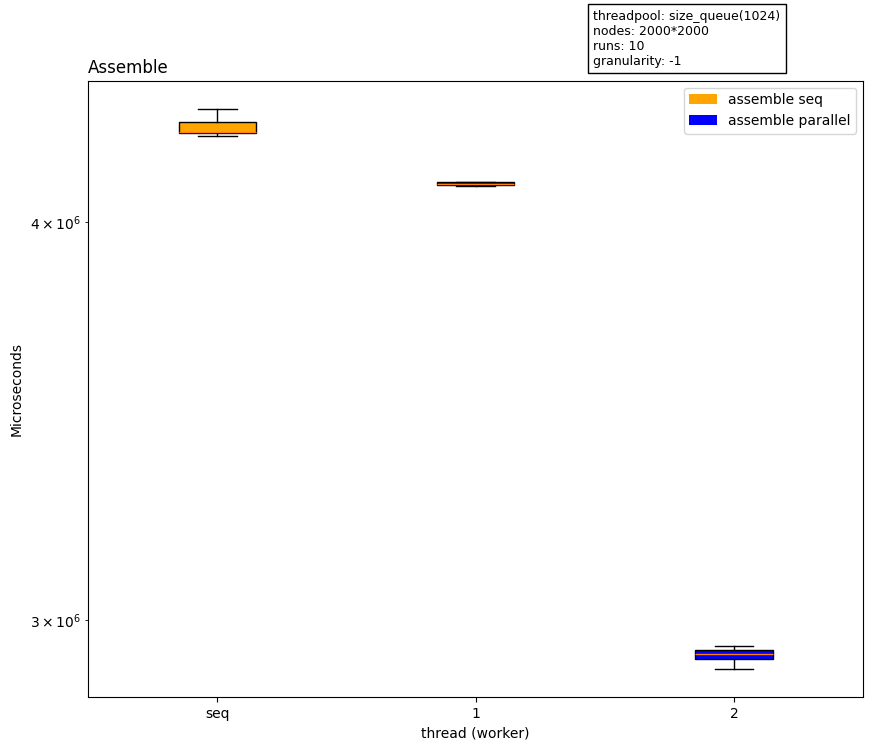

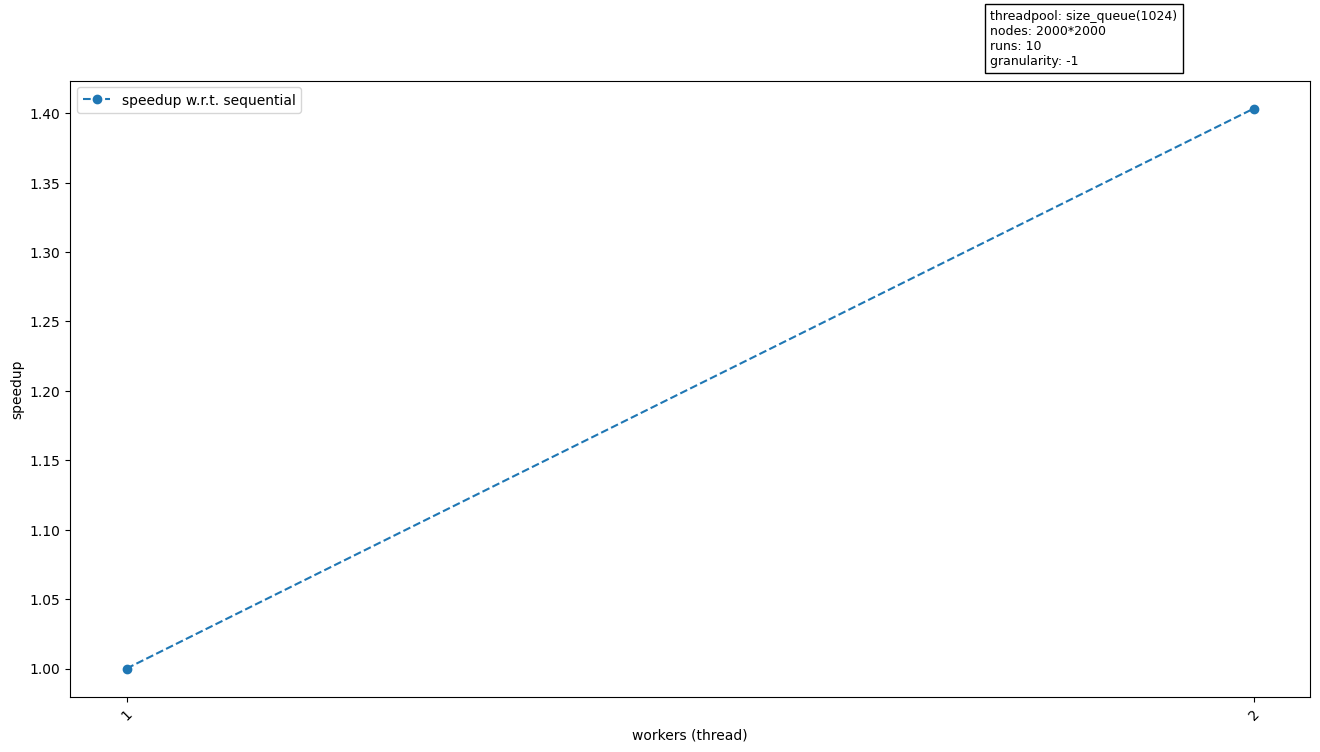

In [66]:
nodi = 2000 #500 250
plot_boxplot(assemble_completo_2000_sequenziale, assemble_nodi_2000_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_completo_2000_sequenziale))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_2000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)


=== Median values (µs) ===
seq: 1036002.50
1: 1022136.50
2: 714516.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.43


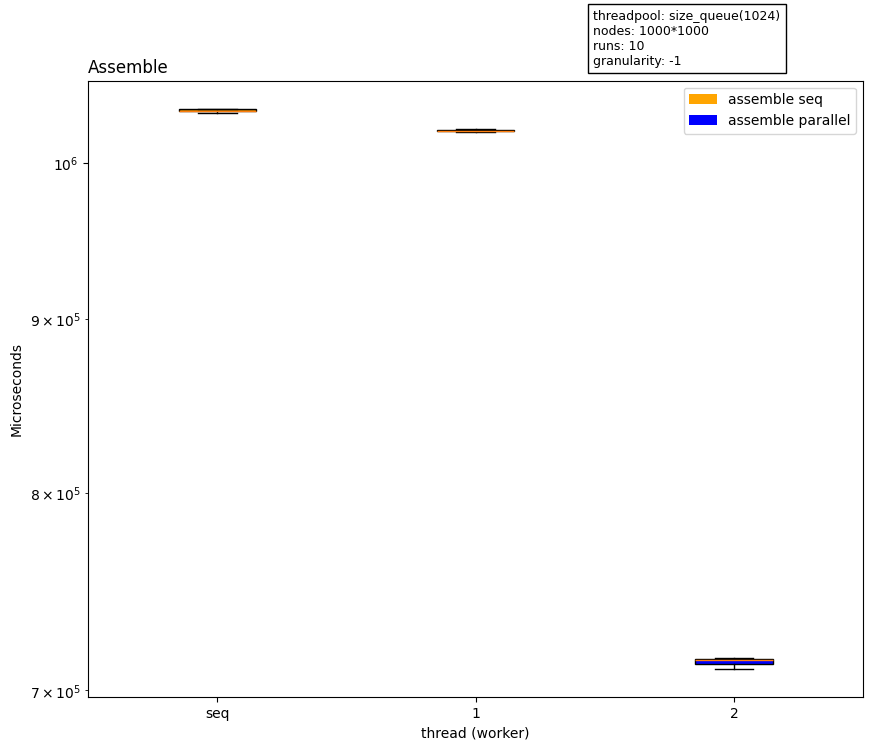

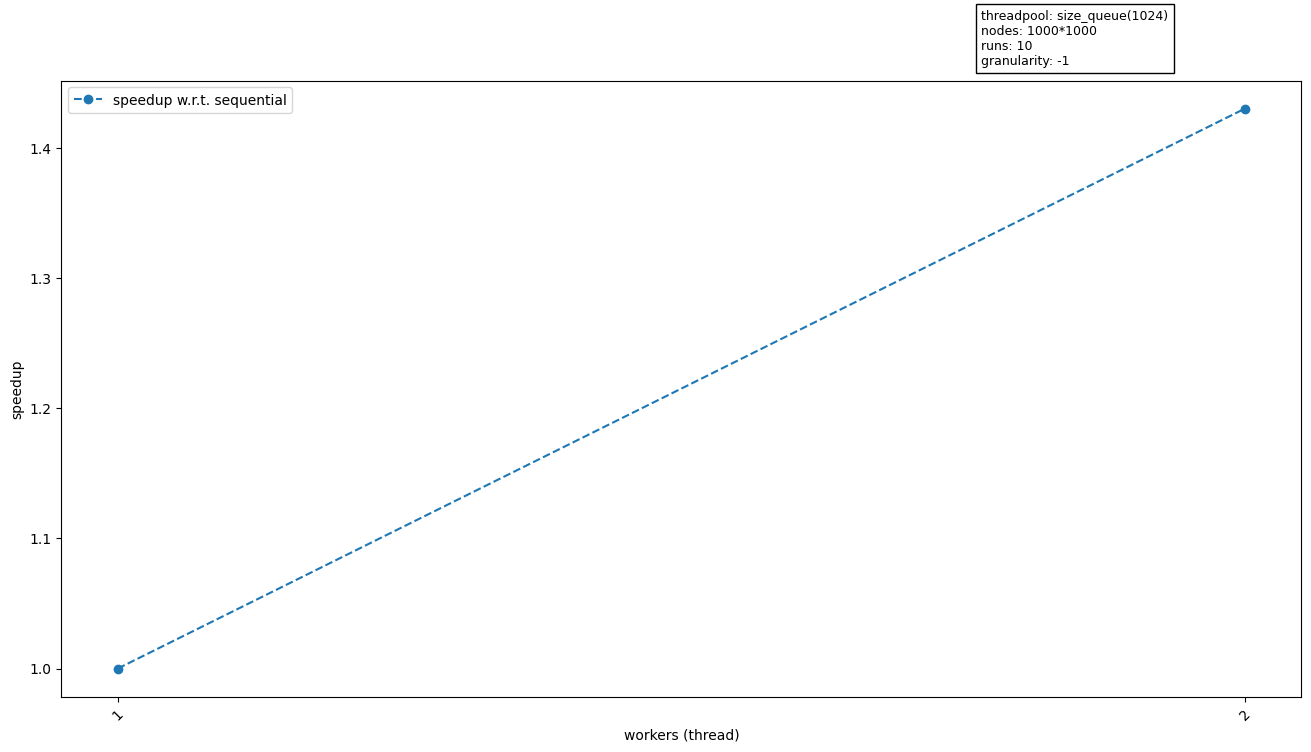

In [67]:
nodi = 1000 #500 250
plot_boxplot(assemble_completo_1000_sequenziale, assemble_nodi_1000_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_completo_1000_sequenziale))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_1000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)


=== Median values (µs) ===
seq: 261433.50
1: 274093.00
2: 185596.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.48


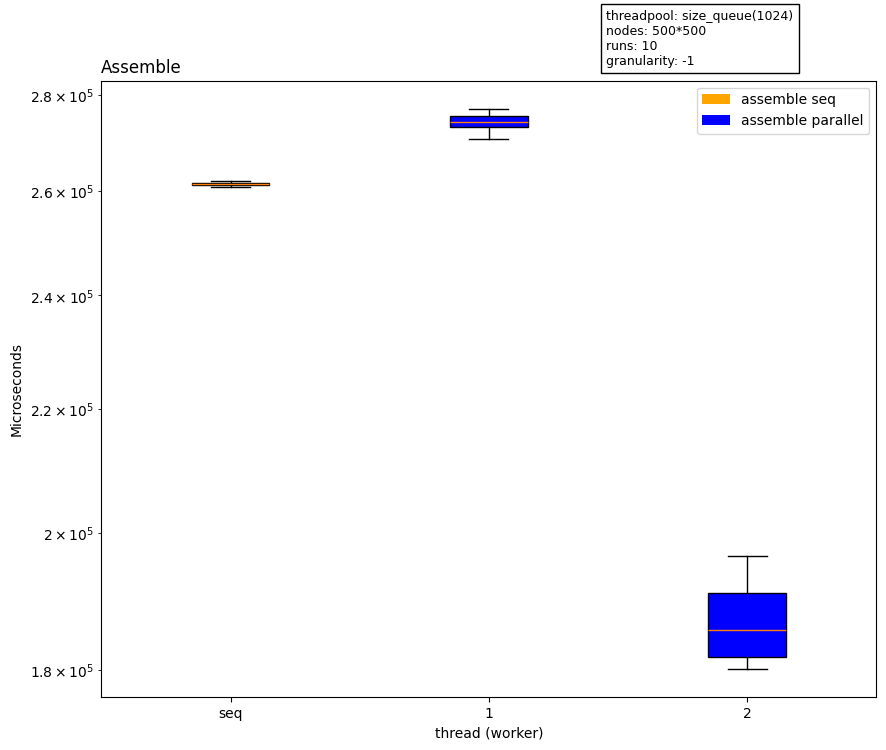

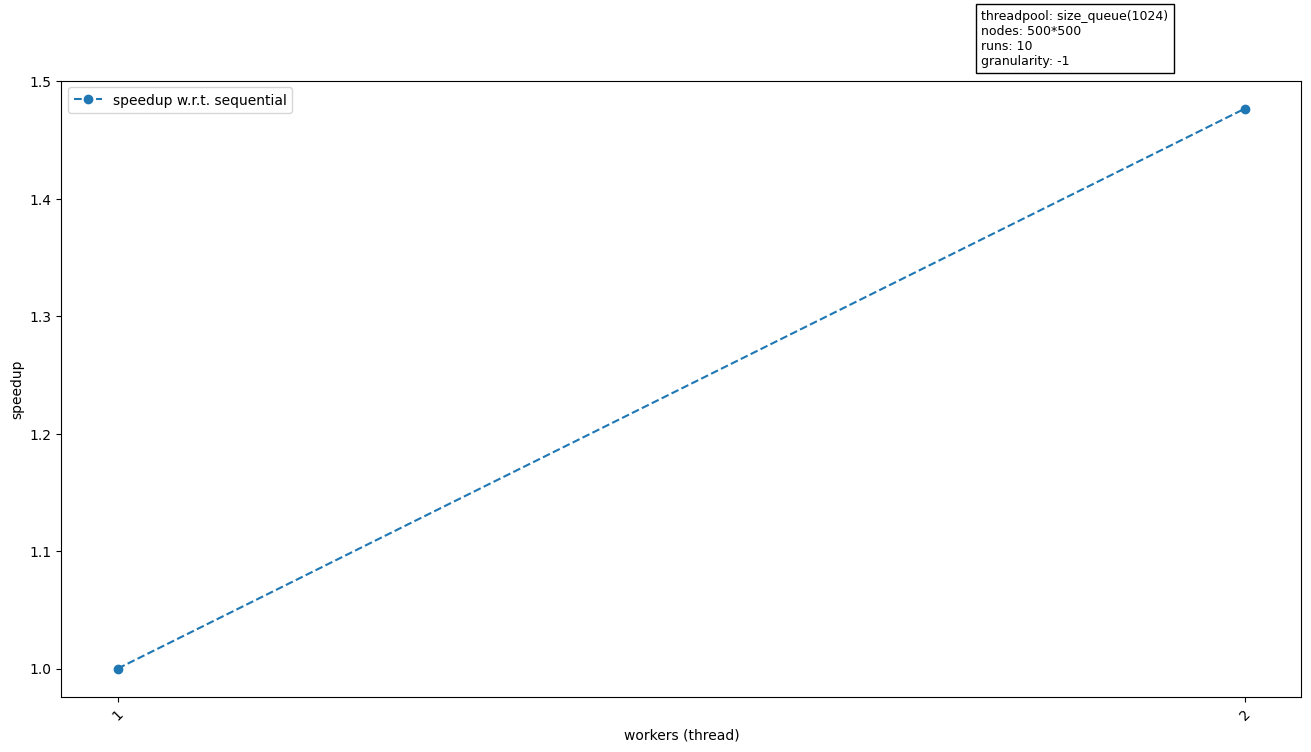

In [68]:
nodi = 500
plot_boxplot(assemble_completo_500_sequenziale, assemble_nodi_500_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_completo_500_sequenziale))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_500_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)


=== Median values (µs) ===
seq: 63217.00
1: 78440.00
2: 49344.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.59


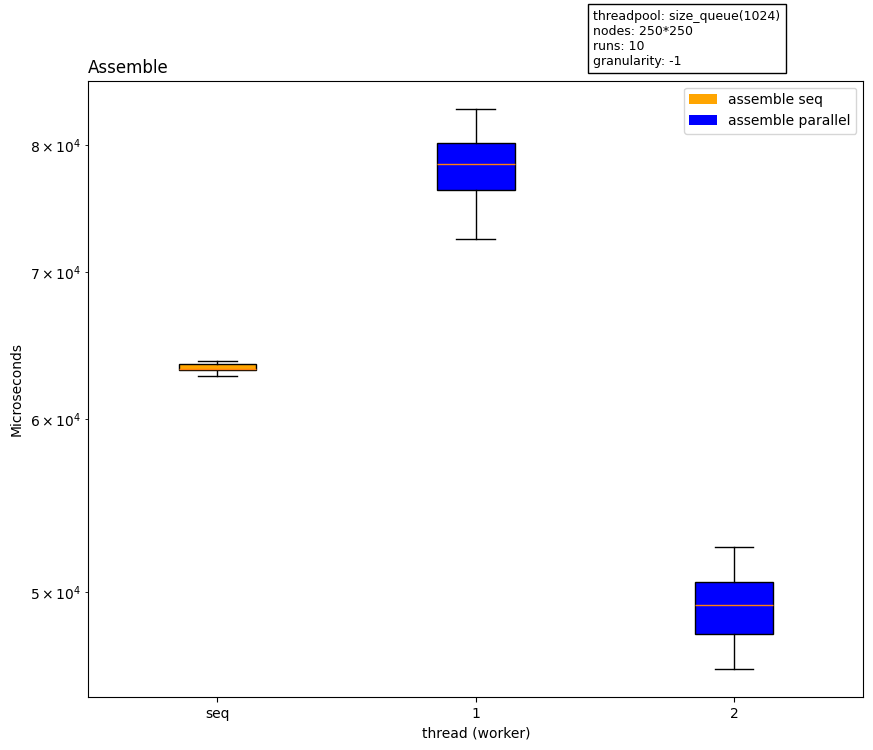

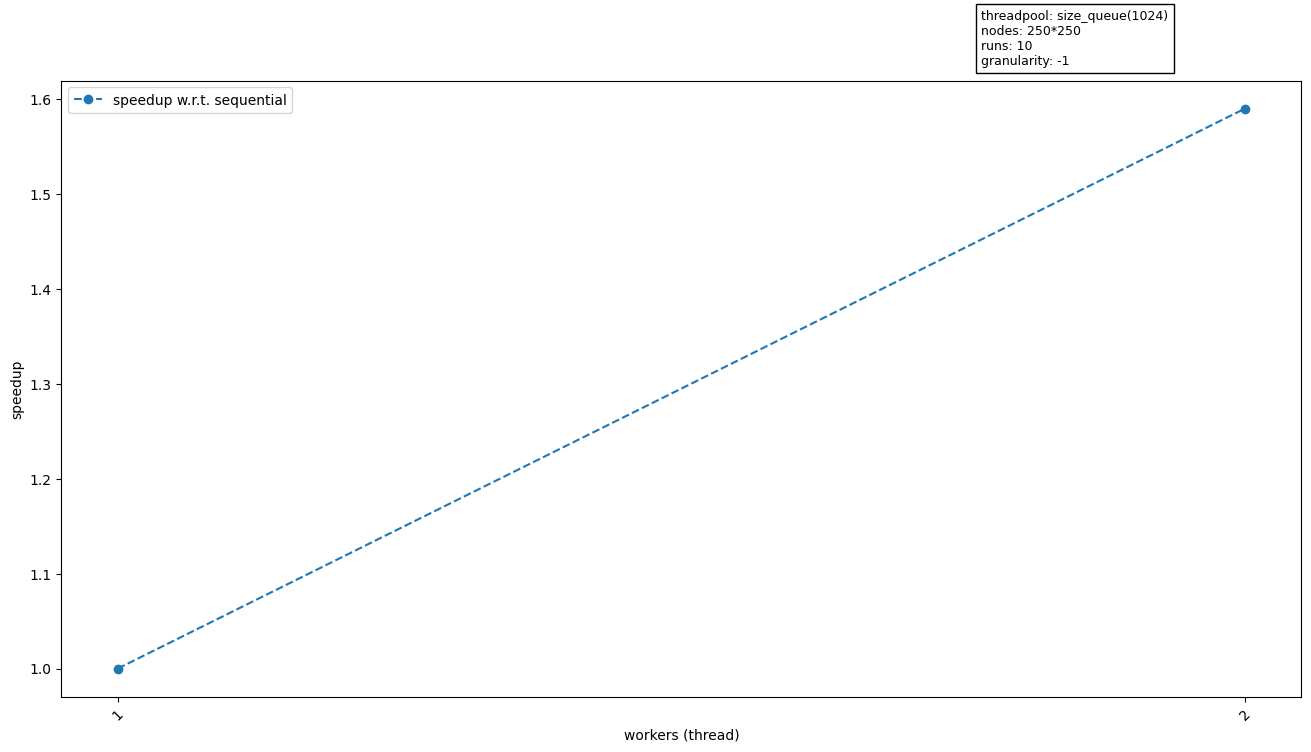

In [69]:
nodi = 250
plot_boxplot(assemble_completo_250_sequenziale, assemble_nodi_250_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_completo_250_sequenziale))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_250_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)

## Calcolo triple 


In [46]:

def plot_speedup(data_list, title, n_threads):
    fig, ax = plt.subplots(figsize=[16, 8])

    # Mediane dei dati
    data_median = [np.median(datum) for datum in data_list]

    # Calcolo speedup
    speedup = np.array([data_median[1] / data_median[i+1] for i in range(len(n_threads))])

    # Linea speedup + marker
    ax.plot(n_threads, speedup, 'o--', color='blue', label='speedup')

    # Linea massimo speedup teorico (speedup = n_threads)
    ax.plot(n_threads, n_threads, 'r--', label='maximum')

    ax.set_title(title, loc='left')
    ax.set_xscale('log', base=2)  # log2 sull'asse x
    ax.set_xticks(n_threads)
    ax.set_xticklabels([str(n) for n in n_threads], rotation=45)
    ax.set_yscale('log', base=2)
    ax.set(xlabel='Workers (threads)', ylabel='Speedup')
    ax.legend()
    
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_list[0])}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print dei valori di speedup con thread ---
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")


In [55]:
# NODI 250
calcolo_triple_nodi_250_multi = [
    calcolo_triple_250_thread_1,
    calcolo_triple_250_thread_2,
    # calcolo_triple_250_thread_3,
    # calcolo_triple_250_thread_4,
    # calcolo_triple_250_thread_5,
    # calcolo_triple_250_thread_6,
    # calcolo_triple_250_thread_7,
    # calcolo_triple_250_thread_8
]

# NODI 500
calcolo_triple_nodi_500_multi = [
    calcolo_triple_500_thread_1,
    calcolo_triple_500_thread_2,
    # calcolo_triple_500_thread_3,
    # calcolo_triple_500_thread_4,
    # calcolo_triple_500_thread_5,
    # calcolo_triple_500_thread_6,
    # calcolo_triple_500_thread_7,
    # calcolo_triple_500_thread_8
]

# NODI 1000
calcolo_triple_nodi_1000_multi =[
    calcolo_triple_1000_thread_1,
    calcolo_triple_1000_thread_2,
    # calcolo_triple_1000_thread_3,
    # calcolo_triple_1000_thread_4,
    # calcolo_triple_1000_thread_5,
    # calcolo_triple_1000_thread_6,
    # calcolo_triple_1000_thread_7,
    # calcolo_triple_1000_thread_8
]

# NODI 2000
calcolo_triple_nodi_2000_multi =[
    calcolo_triple_2000_thread_1,
    calcolo_triple_2000_thread_2,
    # calcolo_triple_1000_thread_3,
    # calcolo_triple_1000_thread_4,
    # calcolo_triple_1000_thread_5,
    # calcolo_triple_1000_thread_6,
    # calcolo_triple_1000_thread_7,
    # calcolo_triple_1000_thread_8
]


=== Median values (µs) ===
seq: 2925207.00
1: 2567429.50
2: 1355170.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.89


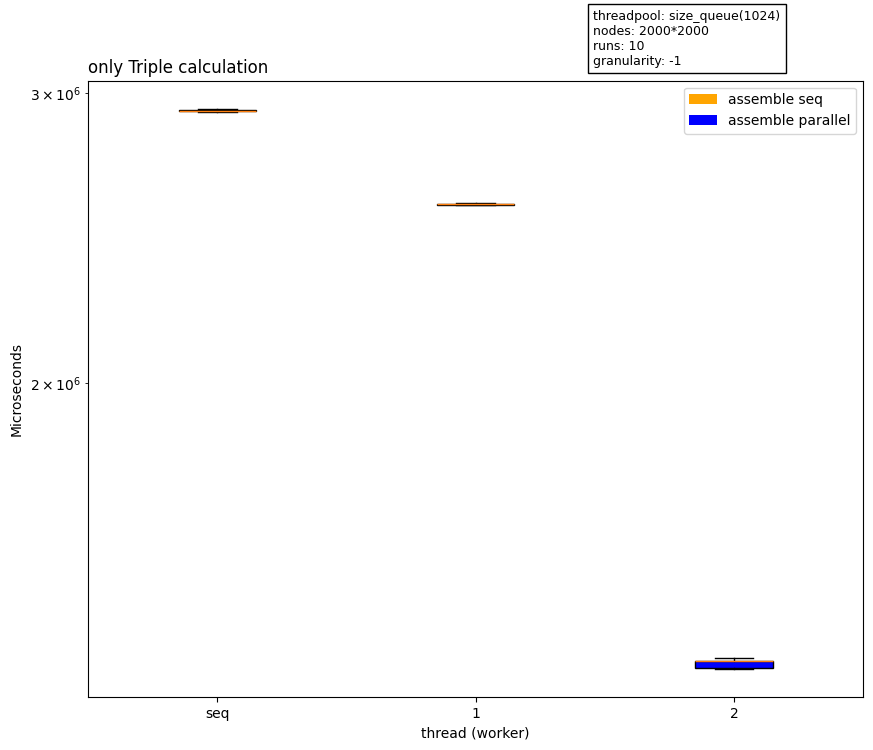

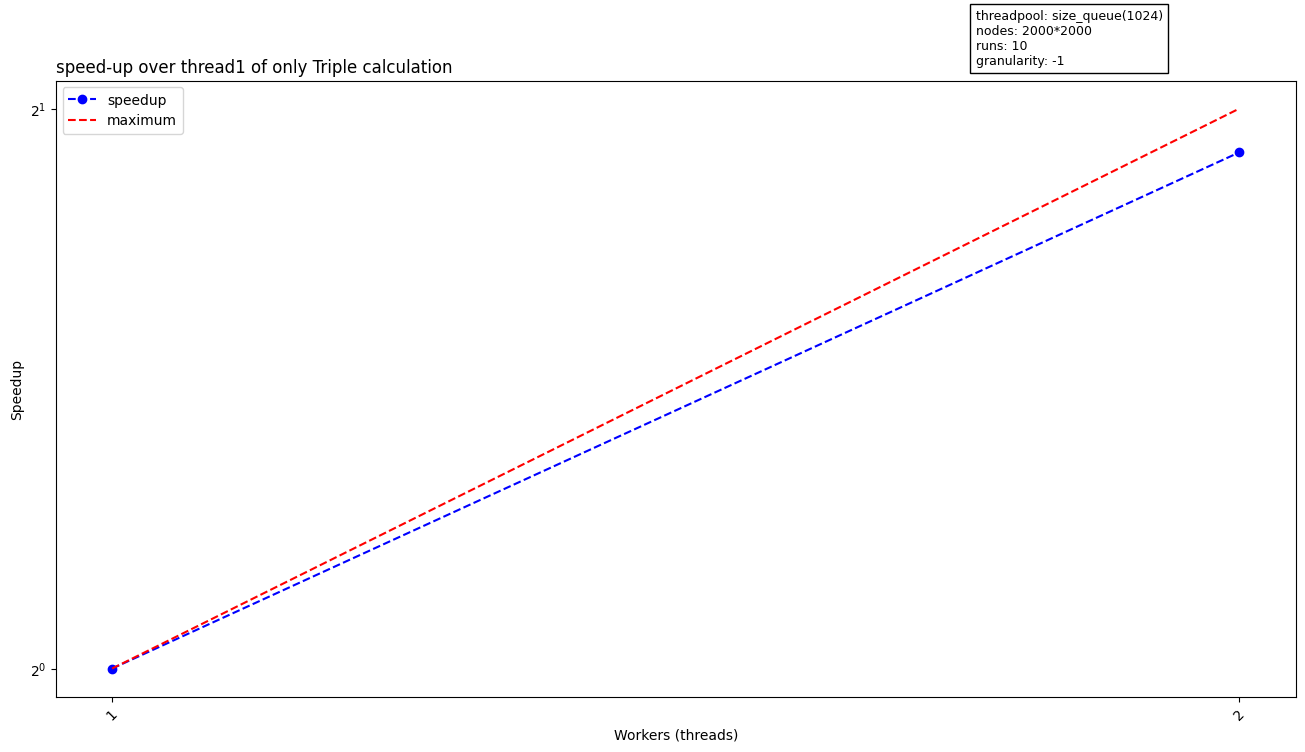

In [56]:
nodi = 2000 #500 250
plot_boxplot(calcolo_triple_2000_sequenziale, calcolo_triple_nodi_2000_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_2000_sequenziale))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_2000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)


=== Median values (µs) ===
seq: 730164.00
1: 652181.00
2: 345355.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.89


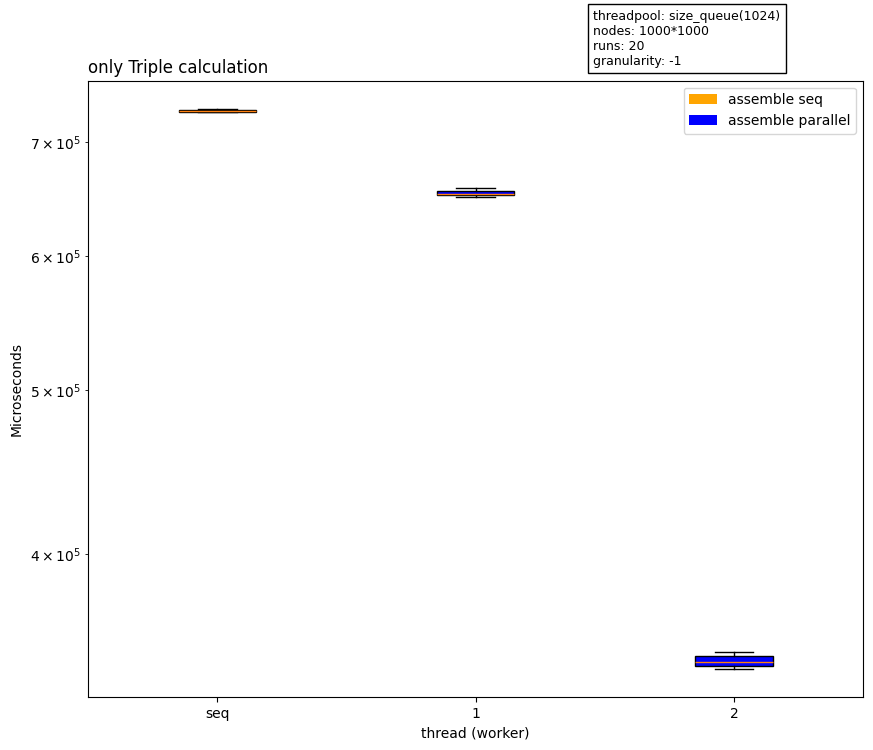

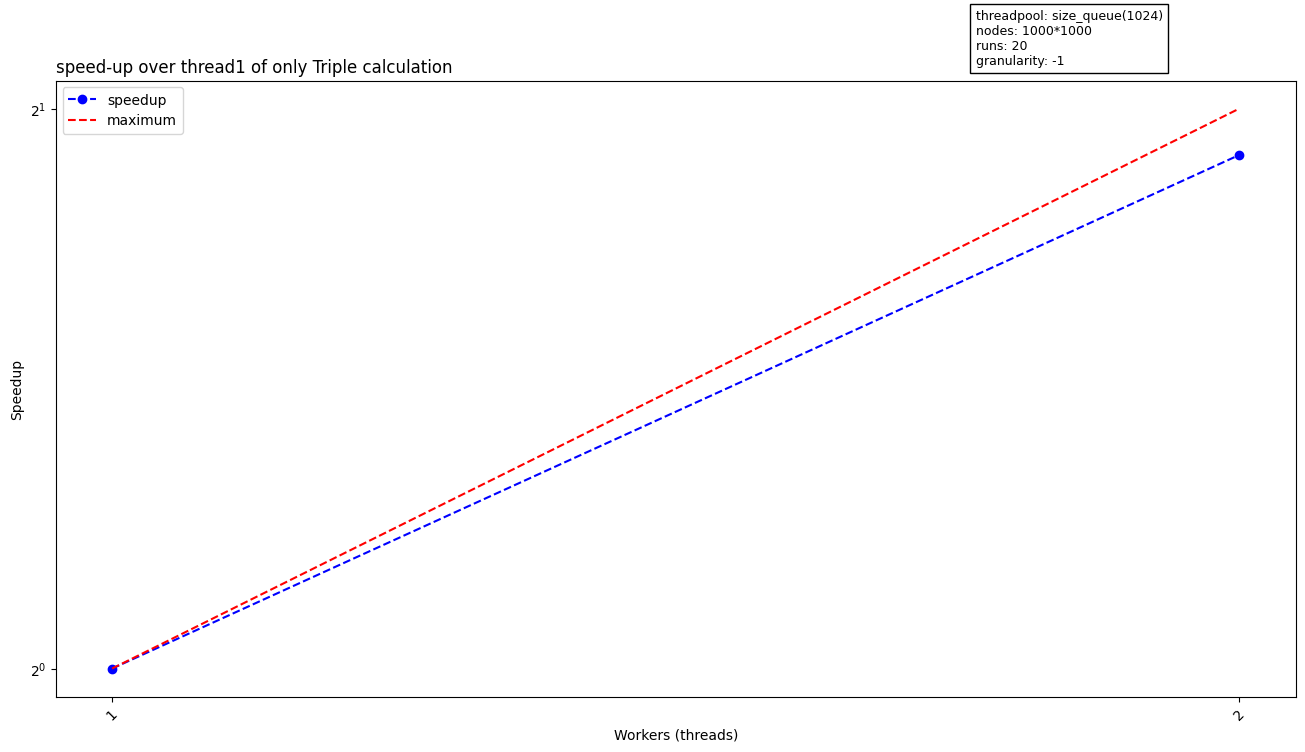

In [48]:
nodi = 1000 #500 250
plot_boxplot(calcolo_triple_1000_sequenziale, calcolo_triple_nodi_1000_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_1000_sequenziale))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_1000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)


=== Median values (µs) ===
seq: 181927.50
1: 172391.00
2: 95727.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.80


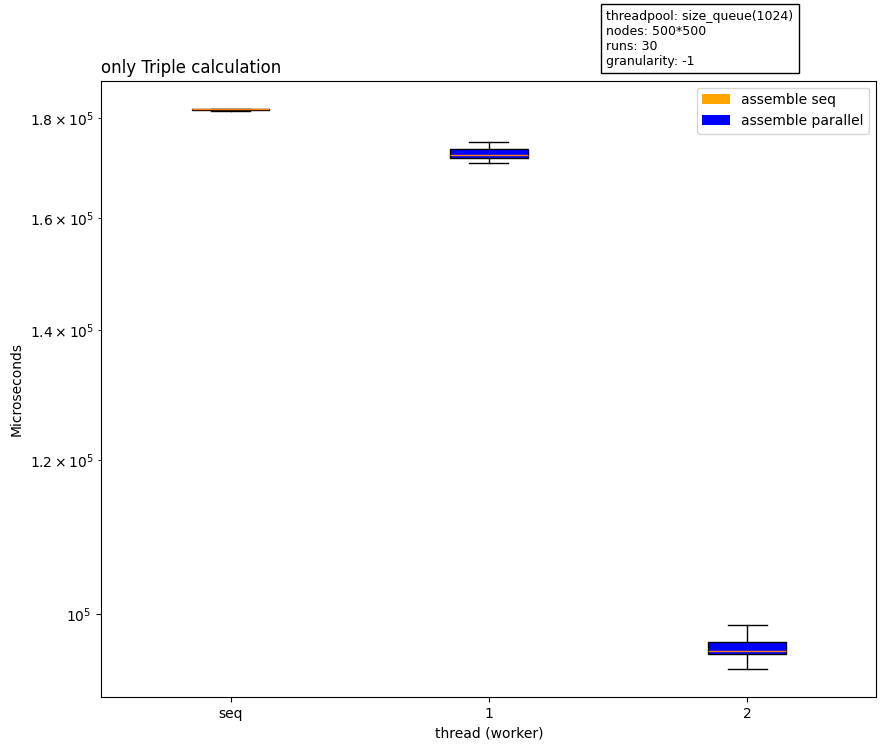

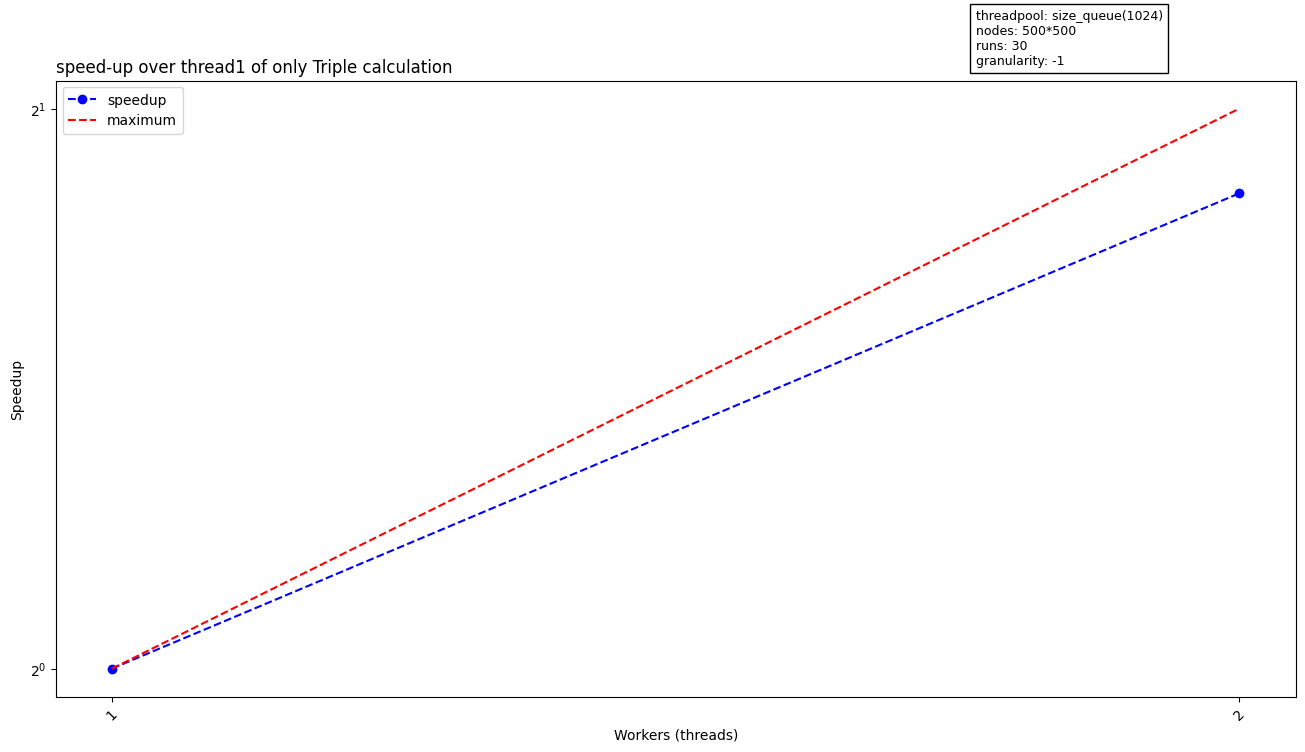

In [49]:
nodi = 500 
plot_boxplot(calcolo_triple_500_sequenziale, calcolo_triple_nodi_500_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_500_sequenziale))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_500_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)


=== Median values (µs) ===
seq: 45291.50
1: 53020.00
2: 33100.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.60


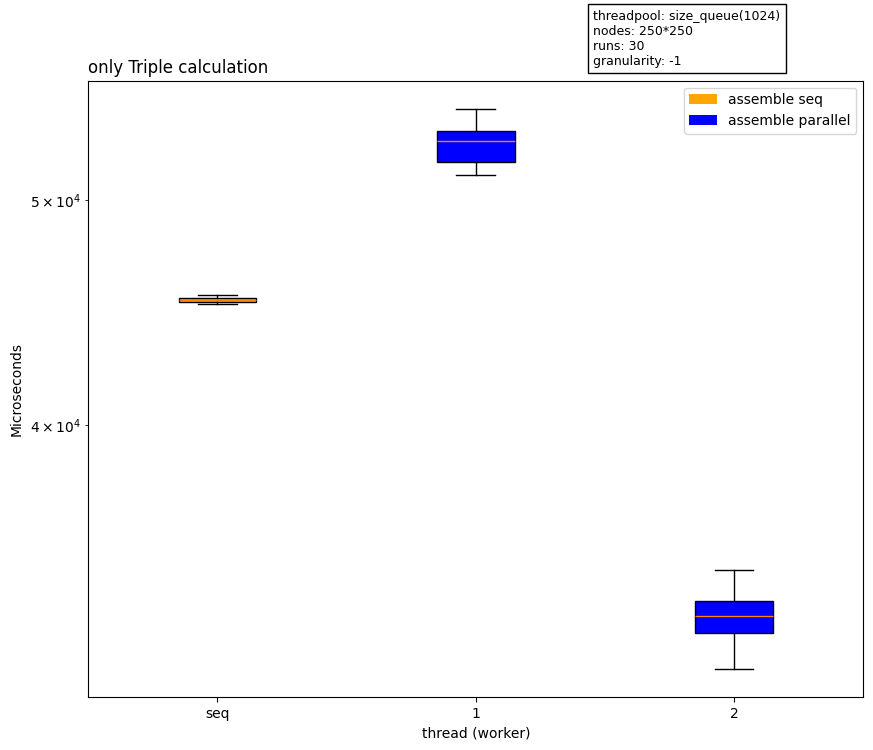

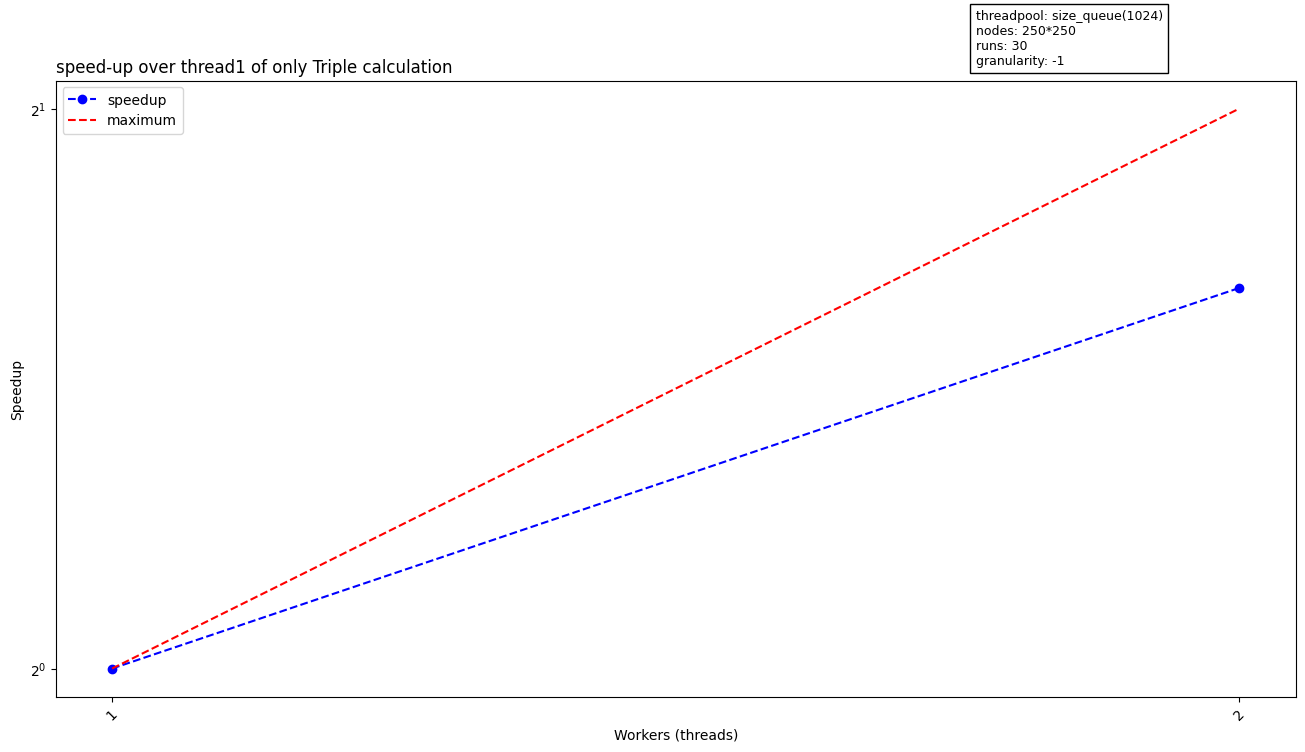

In [50]:
nodi = 250
plot_boxplot(calcolo_triple_250_sequenziale, calcolo_triple_nodi_250_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_250_sequenziale))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_250_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)

## adamal low

In [34]:
# Mediane per nodi 250
median_calcolo_250_seq = np.median(calcolo_triple_nodi_250_thread_seq)
median_calcolo_250_th1 = np.median(calcolo_triple_nodi_250_thread_1)
median_calcolo_250_th2 = np.median(calcolo_triple_nodi_250_thread_2)
median_calcolo_250_th4 = np.median(calcolo_triple_nodi_250_thread_4)
median_calcolo_250_th8 = np.median(calcolo_triple_nodi_250_thread_8)
median_calcolo_250_th16 = np.median(calcolo_triple_nodi_250_thread_16)

# Mediane per nodi 500
median_calcolo_500_seq = np.median(calcolo_triple_nodi_500_thread_seq)
median_calcolo_500_th1 = np.median(calcolo_triple_nodi_500_thread_1)
median_calcolo_500_th2 = np.median(calcolo_triple_nodi_500_thread_2)
median_calcolo_500_th4 = np.median(calcolo_triple_nodi_500_thread_4)
median_calcolo_500_th8 = np.median(calcolo_triple_nodi_500_thread_8)
median_calcolo_500_th16 = np.median(calcolo_triple_nodi_500_thread_16)

# Mediane per nodi 1000
median_calcolo_1000_seq = np.median(calcolo_triple_nodi_1000_thread_seq)
median_calcolo_1000_th1 = np.median(calcolo_triple_nodi_1000_thread_1)
median_calcolo_1000_th2 = np.median(calcolo_triple_nodi_1000_thread_2)
median_calcolo_1000_th4 = np.median(calcolo_triple_nodi_1000_thread_4)
median_calcolo_1000_th8 = np.median(calcolo_triple_nodi_1000_thread_8)
median_calcolo_1000_th16 = np.median(calcolo_triple_nodi_1000_thread_16)


# Mediane per nodi 250
median_assemble_250_seq = np.median(assemble_nodi_250_seq)
median_assemble_250_th1 = np.median(assemble_nodi_250_thread_1)
median_assemble_250_th2 = np.median(assemble_nodi_250_thread_2)
median_assemble_250_th4 = np.median(assemble_nodi_250_thread_4)
median_assemble_250_th8 = np.median(assemble_nodi_250_thread_8)
median_assemble_250_th16 = np.median(assemble_nodi_250_thread_16)

# Mediane per nodi 500
median_assemble_500_seq = np.median(assemble_nodi_500_seq)
median_assemble_500_th1 = np.median(assemble_nodi_500_thread_1)
median_assemble_500_th2 = np.median(assemble_nodi_500_thread_2)
median_assemble_500_th4 = np.median(assemble_nodi_500_thread_4)
median_assemble_500_th8 = np.median(assemble_nodi_500_thread_8)
median_assemble_500_th16 = np.median(assemble_nodi_500_thread_16)

# Mediane per nodi 1000
median_assemble_1000_seq = np.median(assemble_nodi_1000_seq)
median_assemble_1000_th1 = np.median(assemble_nodi_1000_thread_1)
median_assemble_1000_th2 = np.median(assemble_nodi_1000_thread_2)
median_assemble_1000_th4 = np.median(assemble_nodi_1000_thread_4)
median_assemble_1000_th8 = np.median(assemble_nodi_1000_thread_8)
median_assemble_1000_th16 = np.median(assemble_nodi_1000_thread_16)




In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Median values for Assemble
assemble_seq = [median_assemble_250_seq, median_assemble_500_seq, median_assemble_1000_seq]
assemble_th1 = [median_assemble_250_th1, median_assemble_500_th1, median_assemble_1000_th1]
assemble_th2 = [median_assemble_250_th2, median_assemble_500_th2, median_assemble_1000_th2]
assemble_th4 = [median_assemble_250_th4, median_assemble_500_th4, median_assemble_1000_th4]
assemble_th8 = [median_assemble_250_th8, median_assemble_500_th8, median_assemble_1000_th8]
assemble_th16 = [median_assemble_250_th16, median_assemble_500_th16, median_assemble_1000_th16]

# Median values for Calcolo
calcolo_seq = [median_calcolo_250_seq, median_calcolo_500_seq, median_calcolo_1000_seq]
calcolo_th1 = [median_calcolo_250_th1, median_calcolo_500_th1, median_calcolo_1000_th1]
calcolo_th2 = [median_calcolo_250_th2, median_calcolo_500_th2, median_calcolo_1000_th2]
calcolo_th4 = [median_calcolo_250_th4, median_calcolo_500_th4, median_calcolo_1000_th4]
calcolo_th8 = [median_calcolo_250_th8, median_calcolo_500_th8, median_calcolo_1000_th8]
calcolo_th16 = [median_calcolo_250_th16, median_calcolo_500_th16, median_calcolo_1000_th16]



In [ ]:
n = [1,2,4,8,16,32,64,96]
speedup_max = []
for i in n:
    p = calcolo_th1[2]/assemble_th1[2]
    s = 1-p 
    speedup_max.append(1/(s+p/i))
print(speedup_max)
print(calcolo_th1[2]/assemble_th1[2]) #p/(s+p) in nodi 1000 

[np.float64(1.0), np.float64(1.5592481220530163), np.float64(2.164492229258636), np.float64(2.6857475970017313), np.float64(3.053410400201744), np.float64(3.27776352384384), np.float64(3.4027750879599643), np.float64(3.4465919411588)]
0.7173305058295286


In [53]:
def plot_speedup_max(data_list, title, n_threads, speedup_max, size_queue, nodi, kk):
    """
    data_list: primo elemento è sequenziale, gli altri paralleli
    n_threads: lista di thread corrispondenti ai dati paralleli
    speedup_max: vettore dei valori di massimo speedup da mostrare in rosso
    """
    fig, ax = plt.subplots(figsize=[16, 8])

    # Mediane dei dati
    data_median = [np.median(datum) for datum in data_list]

    # Calcolo speedup rispetto al secondo elemento (o al primo sequenziale se preferisci)
    speedup = np.array([data_median[1] / data_median[i+1] for i in range(len(n_threads))])

    # Plot speedup misurato
    ax.plot(n_threads, speedup, 'o--', color='blue', label='speedup w.r.t thread-sequential')

    # Plot speedup massimo
    ax.plot(n_threads, speedup_max, 's--', color='red', label='Amdahl maximum speedup')

    ax.set_xscale('log', base=2)  # log2 sull'asse x
    ax.set_xticks(n_threads)
    ax.set_xticklabels([str(n) for n in n_threads], rotation=45)

    ax.set(xlabel='Workers (threads)', ylabel='Speedup')
    ax.legend()
    
    plt.title(title, loc='left')

    plt.figtext(0.7, 0.9, 
                f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_list[0])}\ngranularity: {kk}", 
                fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
    
    # Print dei valori di speedup con thread
    print("\n=== Speedup values ===")
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")
    print("\n=== Maximum speedup ===")
    for n, s in zip(n_threads, speedup_max):
        print(f"{n} threads -> max speedup: {s:.2f}")



=== Speedup values ===
1 threads -> speedup: 1.00
2 threads -> speedup: 1.53
4 threads -> speedup: 2.11
8 threads -> speedup: 2.65
16 threads -> speedup: 3.00
32 threads -> speedup: 2.96
64 threads -> speedup: 2.97
96 threads -> speedup: 2.90

=== Maximum speedup ===
1 threads -> max speedup: 1.00
2 threads -> max speedup: 1.56
4 threads -> max speedup: 2.16
8 threads -> max speedup: 2.69
16 threads -> max speedup: 3.05
32 threads -> max speedup: 3.28
64 threads -> max speedup: 3.40
96 threads -> max speedup: 3.45


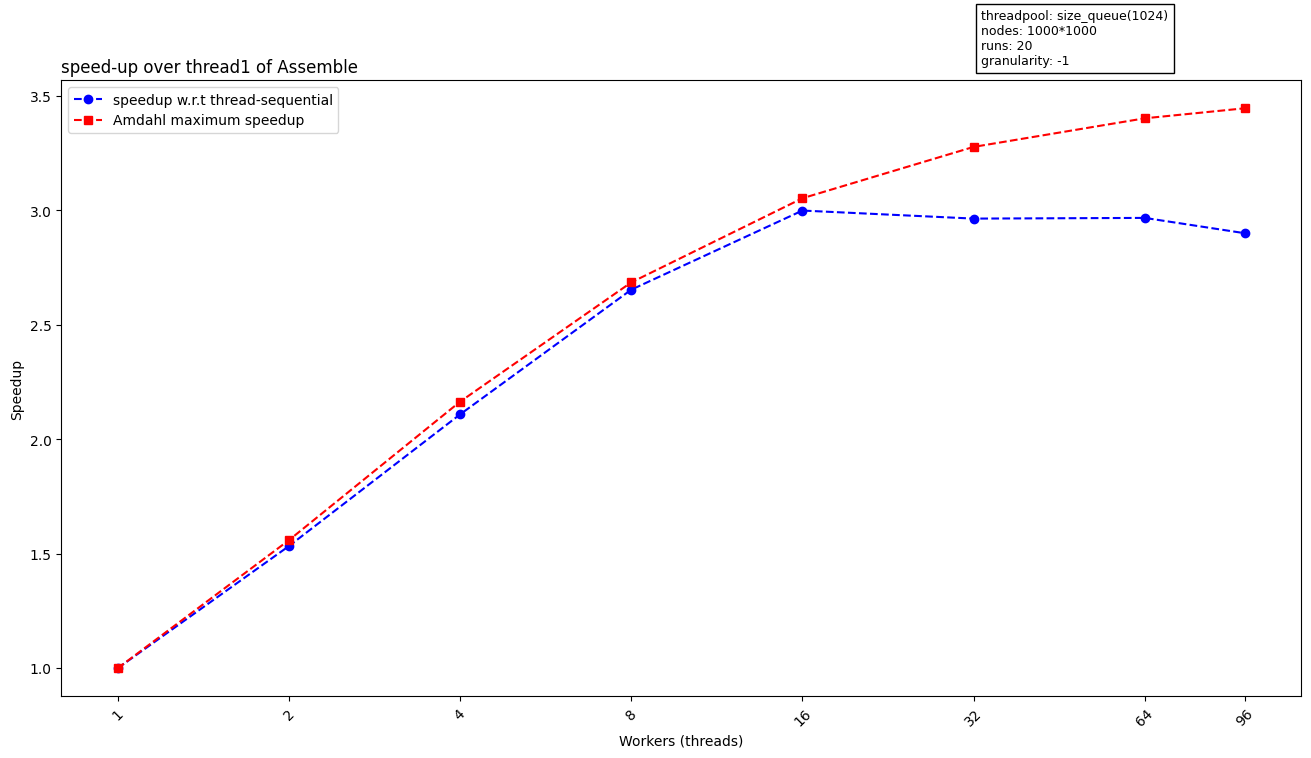

In [62]:
nodi = 1000 #500 250
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_1000_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_1000_multi[i]))
plot_speedup_max(data_list,"speed-up over thread1 of Assemble",n_threads,speedup_max,1024,1000,-1)

In [ ]:
calcolo_th1[2]/assemble_th1[2] # p/s+p in nodi 1000

np.float64(0.7173305058295286)

## scalabilità debole


risultati pessimi, perché job pesanti e thread si disturbano durante ricerca valori credo

In [86]:
def plot_boxplot_weak(data, title, n_threads, nodes, size_queue, granularity):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = data
    ticks = [f"{n},{s}" for n, s in zip(n_threads, nodes)]

    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel='n_thread, sqrt(nodes)', ylabel='Microseconds')
    ax.set_title(title, loc='left')
    ax.set_xticks(range(1, len(boxs) + 1))
    ax.set_xticklabels(ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['blue'] * len(bplot['boxes'])
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [Patch(facecolor='blue', label='grid search parallel')]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, 
                f"threadpool: size_queue({size_queue})\nruns: {len(data[0])}\ngranularity: {granularity}", 
                fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))

    # Print delle mediane dei boxplot
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [87]:

def plot_efficiency(data, title, n_threads, nodes, size_queue, granularity):
    
    # Calcolo efficienza mediana / sequenziale
    seq_median = np.median(data[0])
    efficiencies = [seq_median / np.median(d) for d in data]
    
    # Prepara ticks
    ticks = [f"{n},{s}" for n, s in zip(n_threads, nodes)]
    
    fig, ax = plt.subplots(figsize=[10, 8])
    
    x = range(len(efficiencies))
    
    # Linea + pallini
    ax.plot(x, efficiencies, color='blue', marker='o', linestyle='-', markersize=8)
    
    ax.set(xlabel='n_thread, sqrt(nodes)', ylabel='Efficiency')
    ax.set_title(title, loc='left')
    ax.set_xticks(x)
    ax.set_xticklabels(ticks)
    
    plt.figtext(0.63, 0.9, 
                f"threadpool: size_queue({size_queue})\nruns: {len(data[0])}\ngranularity: {granularity}", 
                fontsize=9, bbox=dict(facecolor='white', edgecolor='black'))
    
    # Print delle efficienze mediane
    print("\n=== Median efficiencies ===")
    for label, eff in zip(ticks, efficiencies):
        print(f"{label}: {eff:.2f}")
    print("===========================\n")


=== Median values (µs) ===
1,250: 25366.00
4,500: 26812.00
16,1000: 28028.50


=== Median efficiencies ===
1,250: 1.00
4,500: 0.95
16,1000: 0.91



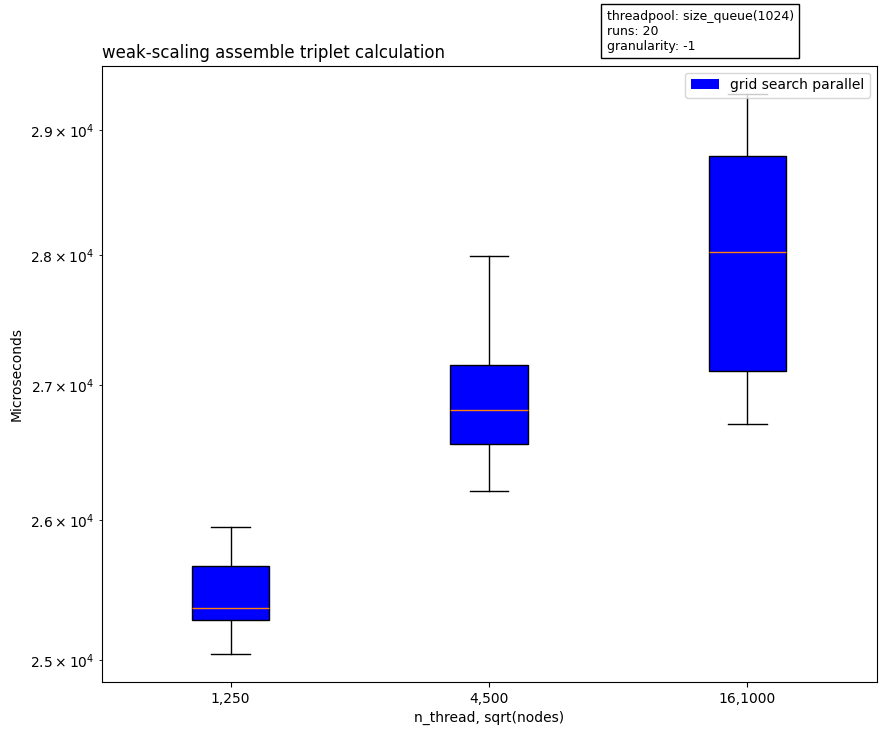

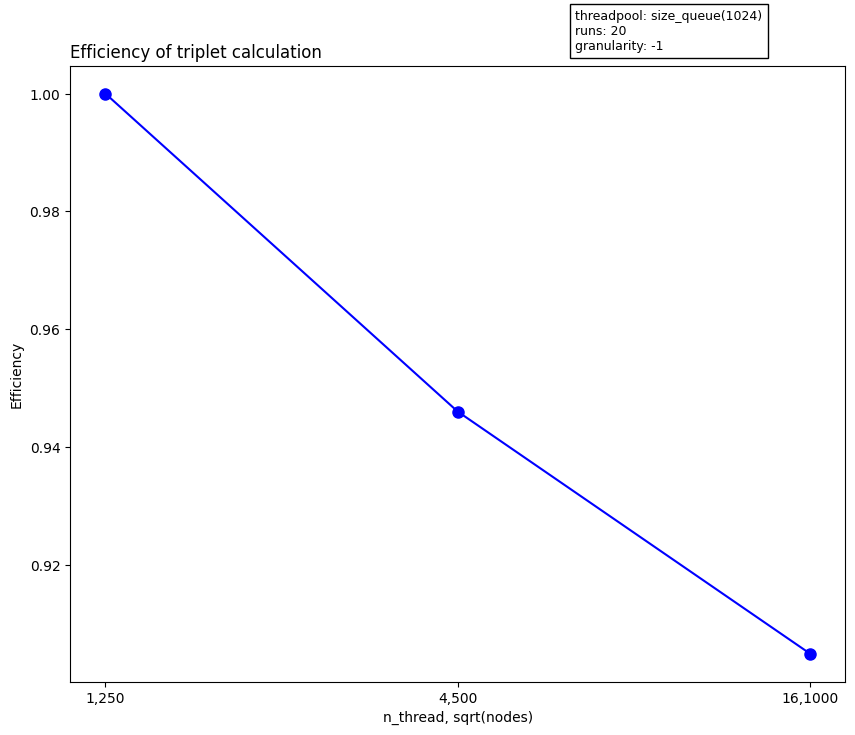

In [89]:
nodes = [250, 500, 1000]
dati = []
dati.append(calcolo_triple_nodi_250_thread_1)
dati.append(calcolo_triple_nodi_500_thread_4)
dati.append(calcolo_triple_nodi_1000_thread_16)
plot_boxplot_weak(dati,"weak-scaling assemble triplet calculation", [1,4,16], nodes,1024,-1)
plot_efficiency(dati,"Efficiency of triplet calculation", [1,4,16], nodes,1024,-1)

## Effetto di granularity

In [56]:
def plot_granularity(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("for")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(granularity[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'iterazioni per job',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='for'),
        Patch(facecolor='blue', label='parallel_for')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes : {nodi}x{nodi}\nruns: {len(data_par_for_n[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [63]:
def plot_speedup_granularity(data_list,title,gran): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list]
    speedup = np.zeros(len(gran))


    for i in range(len(gran)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    #print(data_list)
    #print(data_mean)
    gran = gran[::-1]
    speedup = speedup[::-1]
    ax.plot(gran,speedup,'o--')

    ax.legend(['speedup'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(gran)
    ax.set_xticklabels(gran, rotation = 45)


    ax.set(xlabel = 'graularity'+str(gran),ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes: {nodi}x{nodi}\nruns:{len(data_list[1])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa degli speedup ---
    print("\n=== Speedup values ===")
    for g, s in zip(gran, speedup):
        print(f"Granularity {g}: speedup = {s:.2f}")
    print("=====================\n")

In [ ]:
#parametri
nodi = 500 # tot_celle = (nodi-1)^2, granularity di partenza quindi tot_celle/n_thread
n_thread = 16
size_queue = 1024 #hardcome in codice ma qui non conta
granularity = [62250,6000,600,60] # granularity

In [72]:
dati_seq = []
dati_seq =np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+".txt",delimiter=',',dtype=int)[:-1]
dati_par = []
for i,nb in enumerate(granularity):
    dati_par.append(np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+"_thread"+str(n_thread)+"_granularity"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
for: 94632.00
62250: 53660.00
6000: 52081.00
600: 55985.00
60: 589855.00



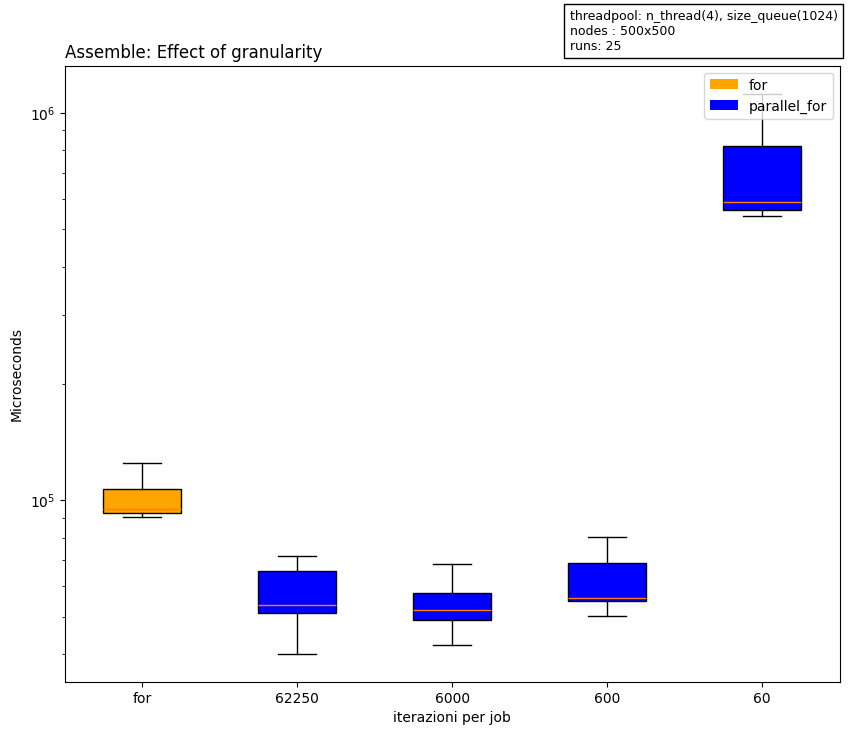

In [73]:
plot_granularity(dati_seq,dati_par,"Assemble: Effect of granularity")


=== Speedup values ===
Granularity 60: speedup = 0.16
Granularity 600: speedup = 1.69
Granularity 6000: speedup = 1.82
Granularity 62250: speedup = 1.76



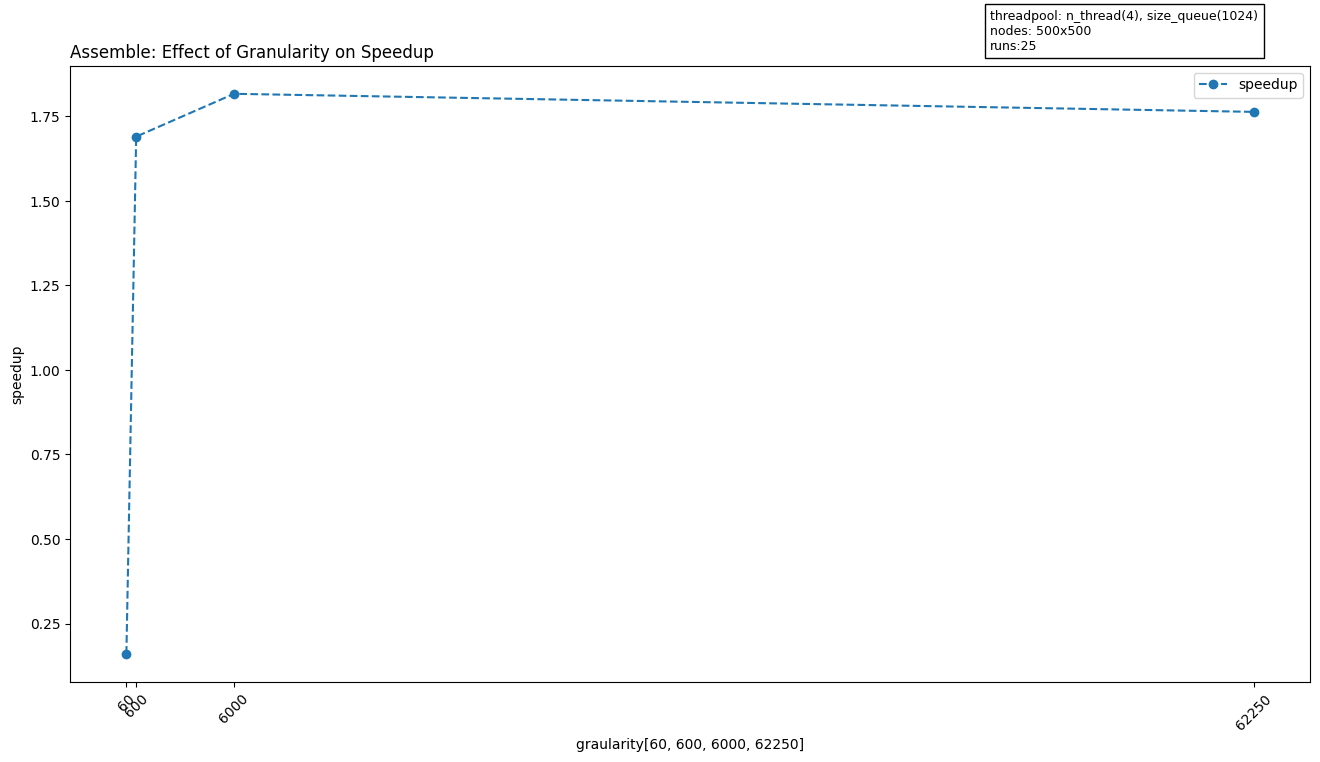

In [74]:
data_list = []
data_list.append(dati_seq)
for i,n in enumerate(granularity):
    data_list.append(dati_par[i])
plot_speedup_granularity(data_list,"Assemble: Effect of Granularity on Speedup",granularity)